- [ ] implement ITIs properly (either with the help of optseq2 or simply from a histogram between 4 and 12 of an exponential distribution)
	- [ ] 3 levels: exact distribution, noise level, randomization of trials
	- [x] get a hist
	- [x] randomize
	- [x] convolve linearly scaled signal response amplitudes with HRF
		- [x] long one: two-gamma with back to baseline after 20s
	- [x] deconvolve or GLM it
	- [ ] noise could be a specific autocrrelated noise, ie Riemann noise with scipy
    - [ ] can I recover the different response amplitudes in beta-weights?

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import random
from scipy.special import gamma
from ITI_simulations import *
import ipywidgets as widgets  # interactive display

In [2]:
# in numpy, histograms are tuples of values/bins
np.histogram([1, 2, 1], bins=[0, 1, 2, 3])

(array([0, 2, 1]), array([0, 1, 2, 3]))

In [3]:
# Tomas' basic exponential histogram over ITI values 1-20
basic_hist = (np.array([20, 10, 5, 2, 1, 1, 0, 0, 0]), np.array([4, 5, 6, 7, 8, 9, 10, 11, 12]))

In [4]:
basic_hist

(array([20, 10,  5,  2,  1,  1,  0,  0,  0]),
 array([ 4,  5,  6,  7,  8,  9, 10, 11, 12]))

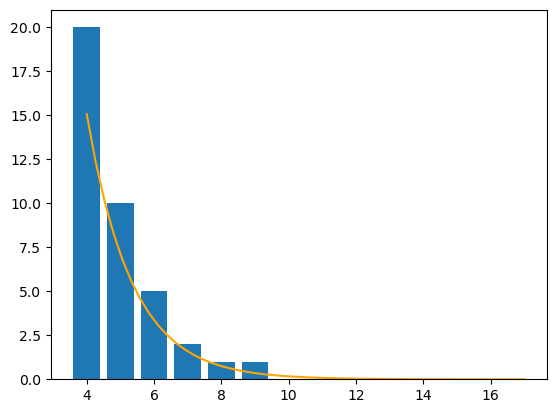

In [5]:
plt.bar(basic_hist[1],basic_hist[0])
x = np.linspace(0, 13)
lam = .75
shift = 4
# plt.show
plt.plot(x + shift, lam * np.exp(-lam * (x - shift)), color = "orange")

In [6]:
# as a widget
shift = 4

@widgets.interact(lam = widgets.FloatSlider(value=1, min=0, max=5, step=.1), 
                  scale = widgets.FloatSlider(value=1, min=0, max=30, step=.1))

def plot_hists(lam, scale):
    fig, ax = plt.subplots()
    ax.bar(basic_hist[1],basic_hist[0])
    ax.plot(x, scale * (lam * np.exp(-lam * (x - shift))), color = "orange")
    ax.vlines(4, 0, 20, color = 'orange')
    ax.set_ylim(0, 20)
    ax.set_xlim(3.5, 20)
    plt.show()

interactive(children=(FloatSlider(value=1.0, description='lam', max=5.0), FloatSlider(value=1.0, description='…

In [7]:
lam * np.exp(-lam * (x - shift))

array([1.50641527e+01, 1.23460767e+01, 1.01184323e+01, 8.29272938e+00,
       6.79644418e+00, 5.57013878e+00, 4.56509980e+00, 3.74140341e+00,
       3.06632934e+00, 2.51306117e+00, 2.05962105e+00, 1.68799666e+00,
       1.38342572e+00, 1.13380954e+00, 9.29232448e-01, 7.61567896e-01,
       6.24155626e-01, 5.11537116e-01, 4.19238744e-01, 3.43594080e-01,
       2.81598239e-01, 2.30788516e-01, 1.89146564e-01, 1.55018210e-01,
       1.27047750e-01, 1.04124095e-01, 8.53366326e-02, 6.99390555e-02,
       5.73197152e-02, 4.69773252e-02, 3.85010476e-02, 3.15541734e-02,
       2.58607472e-02, 2.11946052e-02, 1.73703909e-02, 1.42361925e-02,
       1.16675082e-02, 9.56230024e-03, 7.83694207e-03, 6.42289612e-03,
       5.26399126e-03, 4.31419152e-03, 3.53576736e-03, 2.89779690e-03,
       2.37493761e-03, 1.94641958e-03, 1.59522052e-03, 1.30738949e-03,
       1.07149278e-03, 8.78159716e-04])

In [8]:
# trials is a mapping between trial types and the corresponding amplitude scaling factor 
trials = {"dur_0" : 0,
         "dur_17" : 1,
         "dur_33" : 2,
         "dur_67" : 3,
         "dur_134" : 4,
         "dur_267-isi_0" : 5,
         "dur_533" : 6,
         "isi_17" : 5,
         "isi_33" : 5.1,
         "isi_67" : 5.3,
         "isi_134" : 5.5,
         "isi_267" : 5.8,
         "isi_533" : 6}

In [9]:
t = np.linspace(0, 191, 191 * 10)
t.shape

(1910,)

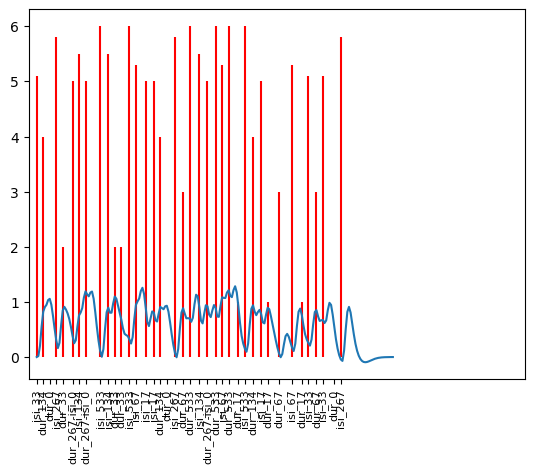

In [10]:
## Testing/putting stuff together
# trials is a mapping between trial types and the corresponding amplitude scaling factor 
trials = {"dur_0" : 0,
         "dur_17" : 1,
         "dur_33" : 2,
         "dur_67" : 3,
         "dur_134" : 4,
         "dur_267-isi_0" : 5,
         "dur_533" : 6,
         "isi_17" : 5,
         "isi_33" : 5.1,
         "isi_67" : 5.3,
         "isi_134" : 5.5,
         "isi_267" : 5.8,
         "isi_533" : 6}

#trials = {"isi_67" : 5.3}

hist = make_hist(n_trials = 2)
hist = (np.array([20, 10, 5, 2, 1, 1, 0, 0, 0]), np.array([4, 5, 6, 7, 8, 9, 10, 11, 12]))
randomized_seq = randomize_trials(hist)
upsampled = unfold_upsample(randomized_seq, upsample_factor = 1)
scaled, events_dict = scale_amplitudes(upsampled, trials = trials)
sc_conv = convolve_HRF(scaled, 1, 30)

events_dict
fig, ax = plot_trial_sequence(scaled, events_dict)
ax.set_xlim(-5, 300)
ax.plot(sc_conv)

In [11]:
sc_conv.shape

(220,)

In [12]:
191*2 - 1

381

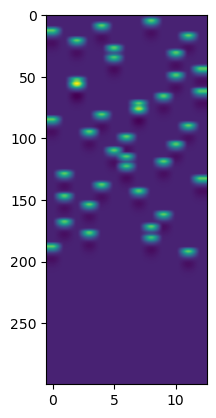

In [13]:
conds = ["dur_0",
         "dur_17",
         "dur_33",
         "dur_67",
         "dur_134",
         "dur_267-isi_0",
         "dur_533",
         "isi_17",
         "isi_33",
         "isi_67",
         "isi_134",
         "isi_267",
         "isi_533"]


def make_design_matrix(events_dict, max_t = 300, conds = ["dur_0", "dur_17", "dur_33", "dur_67", "dur_134",
                                                          "dur_267-isi_0", "dur_533", "isi_17", "isi_33",
                                                          "isi_67", "isi_134", "isi_267", "isi_533"]):
    
    # keep track of conds : tps
    regr_dict = {}
    
    # setup design matrix, shape max_t x len(conds + 1) to keep space for intercept
    design_matrix = np.zeros((max_t, len(conds) + 1))
    
    # for each cond
    for i, cond in enumerate(conds):
        # find timepoints of stimulation
        tps = [key for key, val in events_dict.items() if val == cond]
        regr_dict[cond] = tps
        
        # setup regressor
        regressor = np.zeros(max_t)
        regressor[tps] = 1
        
        # convolve with HRF, cut to max_t, put into matrix
        conv_regressor = convolve_HRF(regressor, 1)[:max_t]
        design_matrix[:,i] = conv_regressor.T 
        
    # column of ones for intercept
    design_matrix[:,-1] = 1
    
    return design_matrix, regr_dict

plt.imshow(make_design_matrix(events_dict)[0][:,:-1], aspect = .1)

In [14]:
import pandas as pd

data = pd.DataFrame(make_design_matrix(events_dict)[0], columns = conds + ['intercept'])
data

,dur_0,dur_17,dur_33,dur_67,dur_134,dur_267-isi_0,dur_533,isi_17,isi_33,isi_67,isi_134,isi_267,isi_533,intercept
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,1.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.003509,0.0,0.0,0.0,0.0,1.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.039907,0.0,0.0,0.0,0.0,1.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.107704,0.0,0.0,0.0,0.0,1.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.161304,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
295,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,1.0
296,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,1.0
297,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,1.0
298,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,1.0


In [15]:
data_= sm.datasets.scotland.load()
data_.exog

,COUTAX,UNEMPF,MOR,ACT,GDP,AGE,COUTAX_FEMALEUNEMP
0,712.0,21.0,105.0,82.4,13566.0,12.3,14952.0
1,643.0,26.5,97.0,80.2,13566.0,15.3,17039.5
2,679.0,28.3,113.0,86.3,9611.0,13.9,19215.7
3,801.0,27.1,109.0,80.4,9483.0,13.6,21707.1
4,753.0,22.0,115.0,64.7,9265.0,14.6,16566.0
5,714.0,24.3,107.0,79.0,9555.0,13.8,17350.2
6,920.0,21.2,118.0,72.2,9611.0,13.3,19504.0
7,779.0,20.5,114.0,75.2,9483.0,14.5,15969.5
8,771.0,23.2,102.0,81.1,9483.0,14.2,17887.2
9,724.0,20.5,112.0,80.3,12656.0,13.7,14842.0


In [17]:
import statsmodels.api as sm
import pandas as pd


# Load modules and data
design_matrix = pd.DataFrame(make_design_matrix(events_dict, 220)[0], columns = conds + ['intercept'])
y_obs = add_noise(sc_conv, 4)
glm = sm.GLM(y_obs, design_matrix, family=sm.families.Gaussian())
glm_results = glm.fit()
print(glm_results.summary())



                 Generalized Linear Model Regression Results                  
Dep. Variable:                      y   No. Observations:                  220
Model:                            GLM   Df Residuals:                      206
Model Family:                Gaussian   Df Model:                           13
Link Function:               Identity   Scale:                        0.060051
Method:                          IRLS   Log-Likelihood:                 4.4478
Date:                Tue, 27 Feb 2024   Deviance:                       12.371
Time:                        07:33:36   Pearson chi2:                     12.4
No. Iterations:                     3   Pseudo R-squ. (CS):             0.9078
Covariance Type:            nonrobust                                         
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
dur_0             0.3099      0.497      0.623

In [18]:
glm_results._results.pseudo_rsquared()

0.9077853181443629

In [24]:
glm_results._results.__dict__
print(glm_results.params)

dur_0            0.309852
dur_17           1.037122
dur_33           1.808346
dur_67           3.298925
dur_134          4.053400
dur_267-isi_0    4.314091
dur_533          5.946885
isi_17           5.213513
isi_33           5.373427
isi_67           5.499091
isi_134          5.949210
isi_267          5.983851
isi_533          5.731596
intercept        0.022153
dtype: float64


In [ ]:
y_pred = glm.predict(glm_results.params)
plt.plot(y_pred)
plt.plot(y_obs)
# plt.plot(sc_conv)

In [ ]:
glm_results.params


In [ ]:
trials_ser = pd.Series(trials)
pd.DataFrame({'glm_weights' :glm_results.params, 'ground':trials_ser})

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import lfilter
import scipy.signal as signal

# Generate white noise
num_samples = 1000
white_noise = np.random.normal(size=num_samples)

# Design a low-pass filter
order = 4  # Filter order
cutoff_frequency = 0.1  # Adjust cutoff frequency as needed
b, a = signal.butter(order, cutoff_frequency, btype='low', analog=False)

# Apply the filter to the white noise to create autocorrelated noise
autocorrelated_noise = lfilter(b, a, white_noise)

# Plot the autocorrelated noise
plt.plot(autocorrelated_noise)
# plt.plot(white_noise)

plt.title('Autocorrelated Noise')
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.show()


In [ ]:
def add_noise(Y, SNR = 1):
    return Y + 1/SNR * np.random.normal(0, 1, size = len(Y))

plt.plot(add_noise(sc_conv, 4))

In [ ]:
import numpy as np

def sample_signal(n_samples, corr, mu=0, sigma=1):
    assert 0 < corr < 1, "Auto-correlation must be between 0 and 1"

    # Find out the offset `c` and the std of the white noise `sigma_e`
    # that produce a signal with the desired mean and variance.
    # See https://en.wikipedia.org/wiki/Autoregressive_model
    # under section "Example: An AR(1) process".
    c = mu * (1 - corr)
    sigma_e = np.sqrt((sigma ** 2) * (1 - corr ** 2))

    # Sample the auto-regressive process.
    signal = [c + np.random.normal(0, sigma_e)]
    for _ in range(1, n_samples):
        signal.append(c + corr * signal[-1] + np.random.normal(0, sigma_e))

    return np.array(signal)

def compute_corr_lag_1(signal):
    return np.corrcoef(signal[:-1], signal[1:])[0][1]

# Examples.
print(compute_corr_lag_1(sample_signal(5000, 0.5)))
print(np.mean(sample_signal(5000, 0.5, mu=2)))
print(np.std(sample_signal(5000, 0.5, sigma=3)))
plt.plot(sample_signal(5000, 0.5, sigma=1)[:100])
plt.plot(sample_signal(5000, 0.9, sigma=1)[:100])

In [ ]:
equi_conv = convolve_HRF(equidistant, 5)

len()

In [ ]:
equidistant = np.zeros(100)
equidistant[25] = 1
equidistant[50] = 2
equidistant[75] = 5


equi_conv = convolve_HRF(equidistant, 1)

plt.plot(equidistant)
plt.plot(equi_conv)
# plt.xlim(25,50)

In [ ]:
# defining the mapping, eyeballing from Zhou et al 2018 fig 5. Potentially getting the exact values from 
# the script trf_mkFigure5.m

## in terms of multiples of the signal
{"dur" :{0 : 0,
        17 : 1,
        33 : 2,
        67 : 3,
        134: 4,
        267: 5,
        533: 6},

 "isi" : {0 : 5, # == 267
        17 : 5.1,
        33 : 5.3,
        67 : 5.5,
        134: 5.7,
        267: 5.8,
        533: 6}}

## in terms of % BOLD change
{"dur" :{0 : 0,
        17 : 1.01,
        33 : 1.02,
        67 : 1.03,
        134: 1.04,
        267: 1.05,
        533: 1.06},

 "isi" : {0 : 1.05, # == 267
        17 : 1.051,
        33 : 1.053,
        67 : 1.055,
        134: 1.057,
        267: 1.058,
        533: 1.06}}

## renaming some
trials = {"dur_0" : 0,
 "dur_17" : 1,
 "dur_33" : 2,
 "dur_67" : 3,
 "dur_134" : 4,
 "dur_267-isi_0" : 5,
 "dur_533" : 6,
 "isi_17" : 5,
 "isi_33" : 5.1,
 "isi_67" : 5.3,
 "isi_134" : 5.5,
 "isi_267" : 5.8,
 "isi_533" : 6}

In [ ]:
from scipy.special import digamma

plt.plot(digamma(np.linspace(0,1)))

from https://arxiv.org/pdf/2004.13361.pdf

## The canonical HRF

There exists several models to describe the functional shape of the HRF. As we mentioned above, one of the most widely used is the two-gamma distribution model [11](https://citeseerx.ist.psu.edu/document?repid=rep1&type=pdf&doi=894ae718197c528700bc4c8bf9a3b94bf4be6a7d), usually referred to as the canonical HRF. In general, the canonical HRF in a parametric model that can be written as:

$$
h(t) = \frac{t^{a_1−1}e^{-a_2t}}{\Gamma(a_1)} - \alpha \frac{t^{a_3−1}e^{-a_4t}}{\Gamma(a_3)},
$$

where $\Gamma(\cdot)$ is the Gamma function, $\alpha$ controls the relative rati of response to undershoot, and $a_1$, $a_2$, $a_3$, and $a_4$ are four parameters that controls the functional shape of the HRF. Therefore, for this model, a total number of 5 parameters are required to define the HRF.

In [ ]:
from scipy.special import gamma

def canHRF(t, a1=6, a2=1, a3=16, a4=1, alpha=1/6):
    """
    makes a canonical two-gamma HRF according to 
    
    $$
    h(t) = \frac{t^{a_1−1}e^{-a_2t}}{\Gamma(a_1)} - \alpha \frac{t^{a_3−1}e^{-a_4t}}{\Gamma(a_3)},
    $$
    
    t is the input time
    a1, a2, a3, a4 are shape params
    alpha controls the ratio of response to undershoot
    
    some plausible parameters are: alpha = 1/6, a1 = 6, 
    a3 = 16 and a2 = a4 = 1, see defaults, 
    which give a nice hrf returning to baseline after 25s
    """
    
    hrf = (t**(a1-1) * np.exp(-a2*t))/gamma(a1) - alpha * (t**(a3-1) * np.exp(-a4*t))/gamma(a3)
    return hrf

t = np.linspace(0, 30, 100)
plt.plot(t, canHRF(t))

## Geometric distributions are the discrete equivalent of Exponential

see also [wiki](https://en.wikipedia.org/wiki/Geometric_distribution).

In fact, the method Tomas used to draw the initial histogram was choosing some rate (parameter $p$, $\lambda$ is the exponential distribution equivalent), in this case .5 and proceeding as follows:

```
bin_1 = n_trials * .5
bin_2 = bin_1 - bin_1 * .5
bin_3 = bin_2 - bin_2 * .5
.
.
.
```
Therefore, one could try out different rates for this.

In [ ]:
import numpy as np

def get_geometric_dist(p, length):
    
    geometric_dist = np.zeros(length)
    geometric_dist[0] = p
    
    for i in range(1, length):
        geometric_dist[i] = geometric_dist[i-1] - (geometric_dist[i-1] * p) 
        
    return geometric_dist

In [ ]:
text_offset = 5

@widgets.interact(rate = widgets.FloatSlider(value=.5, min=0, max=1, step=.01),
                 n_bins = widgets.IntSlider(value=10, min=5, max=20, step=1))

def plot_hists(rate, n_bins):
    fig, ax = plt.subplots()
    geom_dist = get_geometric_dist(rate, n_bins)
    vals = np.round(get_geometric_dist(rate, n_bins) * 39)
    bins = np.arange(4, n_bins + 4)
    ax.bar(bins, vals)
    ax.set_ylim(0, 30)

    ax.text(plt.xlim()[1]-text_offset, plt.ylim()[1]-text_offset, f"total prob_mass = {np.sum(geom_dist):.3f},\ntotal n_trials = {np.sum(vals)},\ntotal time = {np.dot(vals,bins)}")
    plt.show()
#     print(plt.xlim()[0]-2, plt.ylim()[0]-2, f"total PM = {np.sum(geom_dist)},\ntotal n_trials = {np.sum(vals)}")
    


## Going to TR-space

In [5]:
TR = 1.33
np.array([4, 5, 6, 7, 8, 9, 10, 11, 12])*TR
(np.array([4, 5, 6, 7, 8, 9, 10, 11, 12])- 1)*TR


array([ 3.99,  5.32,  6.65,  7.98,  9.31, 10.64, 11.97, 13.3 , 14.63])